**This project builds a predictive model for ticket sales using a dataset of 3,000 simulated events. By employing a Random Forest Regressor, the model forecasts sales based on features such as ticket price, venue capacity, social media mentions, and promotional discounts. Key outcomes include a Mean Absolute Error of 39.25 and an R-squared value of 0.99, highlighting the model's accuracy. Additionally, a user-friendly function allows users to predict sales for new events based on customizable parameters.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/simulated_ticket_sales_data.csv')

In [ ]:
# Basic data exploration
print(df.shape)  # Dimensions of the DataFrame
print(df.info())  # Data types and non-null counts
print(df.describe())  # Summary statistics

(3000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   event_id               3000 non-null   int64  
 1   event_name             3000 non-null   object 
 2   event_location         3000 non-null   object 
 3   venue_capacity         3000 non-null   int64  
 4   ticket_price           3000 non-null   float64
 5   social_media_mentions  3000 non-null   int64  
 6   days_until_event       3000 non-null   int64  
 7   promotional_discount   3000 non-null   float64
 8   weather_forcast        3000 non-null   object 
 9   final_tickets_sold     3000 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 234.5+ KB
None
          event_id  venue_capacity  ticket_price  social_media_mentions  \
count  3000.000000     3000.000000   3000.000000            3000.000000   
mean   1500.500000    25569.535667  104

In [ ]:
# Check for missing values
print(df.isnull().sum())

event_id                 0
event_name               0
event_location           0
venue_capacity           0
ticket_price             0
social_media_mentions    0
days_until_event         0
promotional_discount     0
weather_forcast          0
final_tickets_sold       0
dtype: int64


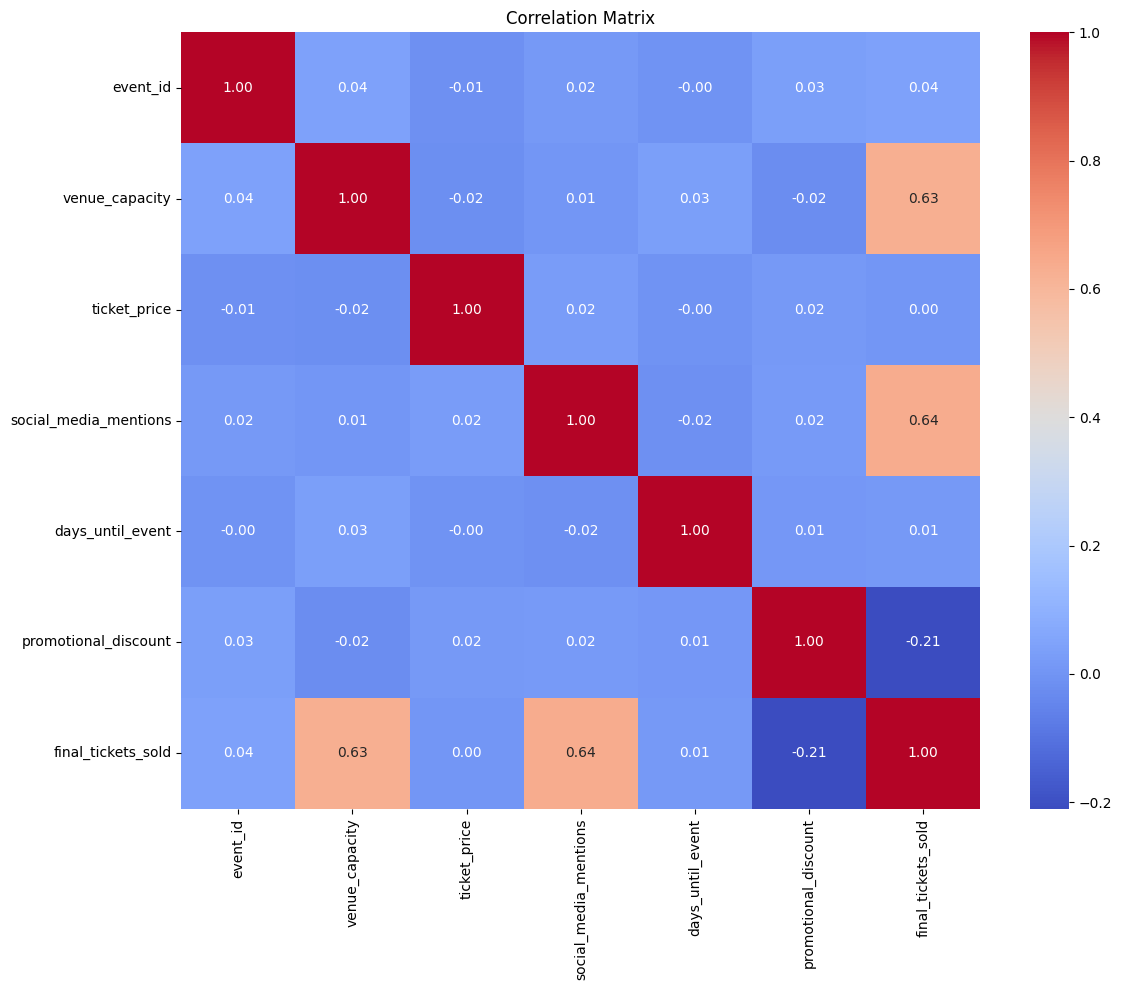

In [ ]:
# Correlation matrix and heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
#Feature Engineering
df['price_per_capacity'] = df['ticket_price'] / df['venue_capacity']
df['mentions_per_day'] = df['social_media_mentions'] / df['days_until_event'].replace(0, np.nan)  # Prevent division by zero
df['discounted_price'] = df['ticket_price'] * (1 - df['promotional_discount'])
df['log_social_media_mentions'] = np.log1p(df['social_media_mentions'])  # Using log1p to handle zero values

In [ ]:
# Feature selection
features = [
    'ticket_price',
    'venue_capacity',
    'social_media_mentions',
    'days_until_event',
    'promotional_discount',
    'price_per_capacity',
    'mentions_per_day',
    'discounted_price',
    'log_social_media_mentions'  # Include log-transformed feature
]

In [ ]:
X = df[features]
y = df['final_tickets_sold']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Model training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on test data
y_pred = rf_model.predict(X_test_scaled)

In [ ]:
# Model Evaluation
mse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Absolute Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 39.25
R-squared: 0.99


In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

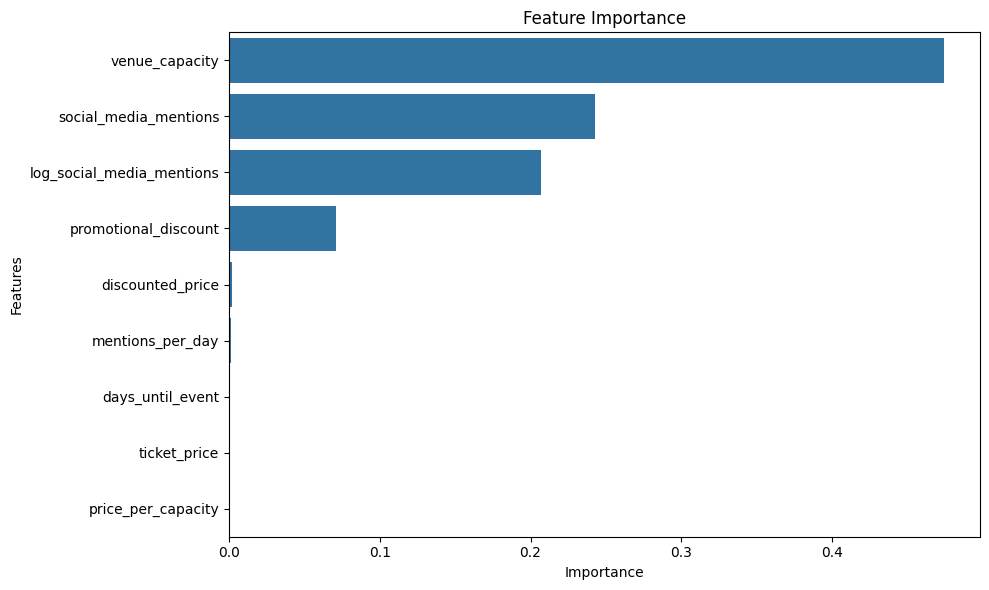

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
# Display Top 5 important features
print("Top 5 important features:")
print(feature_importance.head(5))

Top 5 important features:
                     feature  importance
1             venue_capacity    0.474435
2      social_media_mentions    0.242556
8  log_social_media_mentions    0.206797
4       promotional_discount    0.070712
7           discounted_price    0.002042


In [ ]:
# Function to predict sales for a new concert
def predict_sales(ticket_price, venue_capacity, social_media_mentions, days_until_event, promotional_discount):
    # Input validation
    if venue_capacity <= 0:
        raise ValueError("Venue capacity must be greater than 0.")
    if days_until_event <= 0:
        raise ValueError("Days until event must be greater than 0.")

    # Feature calculation
    price_per_capacity = ticket_price / venue_capacity
    mentions_per_day = social_media_mentions / days_until_event
    discounted_price = ticket_price * (1 - promotional_discount)
    # Create DataFrame with input data
    input_data = pd.DataFrame({
        'ticket_price': [ticket_price],
        'venue_capacity': [venue_capacity],
        'social_media_mentions': [social_media_mentions],
        'days_until_event': [days_until_event],
        'promotional_discount': [promotional_discount],
        'price_per_capacity': [price_per_capacity],
        'mentions_per_day': [mentions_per_day],
        'discounted_price': [discounted_price],
        'log_social_media_mentions': [np.log1p(social_media_mentions)]  # Using log1p for consistency
    })

    input_data_scaled = scaler.transform(input_data)
    predicted_sales = rf_model.predict(input_data_scaled.reshape(1, -1))
    return predicted_sales

In [ ]:
# Example prediction
venue_capacity = 60000  # Assuming large audience
ticket_price = 5000  # in Indian Rupee
social_media_mentions = 10000  # Assuming high usage of social media
days_until_event = 30
promotional_discount = 0.1

predicted_sales = predict_sales(ticket_price, venue_capacity, social_media_mentions, days_until_event, promotional_discount)
print(f"Predicted ticket sales for the upcoming concert: {predicted_sales[0]:.0f}")
print(f"Predicted Sales utilization: {(predicted_sales[0] / venue_capacity) * 100:.2f}%")

Predicted ticket sales for the upcoming concert: 4242
Predicted Sales utilization: 7.07%
